---
#### 1. The weights of steers in a herd are distributed normally.  The variance is 40,000 and the mean steer weight is 1300 lbs.  Find the probability that the weight of a randomly selected steer is greater than 979 lbs. (Round your answer to 4 decimal places)
---

In [125]:
import numpy as np
import scipy.stats as st

# store the mean
m = 1300

# store the variance
v = 40000

# calculate the standard devation: sqrt(var)
std = np.sqrt(v)

# calculate z-score: z = (x - m)/std
x = 979
z = (x - m)/std

# calculate p value
p_val = st.norm.sf(abs(z))

# calculate probability from p value, rounded to 4 decimals
prob = round((1 - p_val) * 100, 4)
print("z-score: {}".format(z))
print("p-value: {}".format(p_val))
print("Probability = {}%".format(prob))

z-score: -1.605
p-value: 0.05424690233591037
Probability = 94.5753%


In [126]:
# function to perform the above

def prob_norm(mean, variance, value, dec=4):
    '''
    takes three arguments: mean, variance, and value, and returns
    probability in a normal distribution
    
    takes optional argument to round decimal spaces, default: 4
    
    requires numpy and scipy.stats packages
    '''
    # calculate standard deviation from variance: sqrt(variance)
    std = np.sqrt(variance)
    
    # calculate z-score: z = (value - mean)/std
    z = (value - mean)/std
    
    # calculate p value from z score
    p = st.norm.sf(abs(z))
    
    # calculate probability from p value, rounded to 4 decimals
    prob = round((1 - p) * 100, dec)
    
    print("z-score: {}".format(z))
    print("p-value: {}".format(p))
    print("Probability = {}%".format(prob))

In [127]:
# check function

prob_norm(mean=1300, variance=40000, value=979)

z-score: -1.605
p-value: 0.05424690233591037
Probability = 94.5753%


<b> Answer: </b> 94.5753%

---
#### 2. 	SVGA monitors manufactured by TSI Electronics have life spans that have a normal distribution with a variance of 1,960,000 and a mean life span of 11,000 hours.  If a SVGA monitor is selected at random, find the probability that the life span of the monitor will be more than 8340 hours. (Round your answer to 4 decimal places)
---

In [128]:
prob_norm(mean=11000, variance=1960000, value=8340)

z-score: -1.9
p-value: 0.028716559816001803
Probability = 97.1283%


<b> Answer:</b> 97.1283%

---
#### 3. 	Suppose the mean income of firms in the industry for a year is 80 million dollars with a standard deviation of 3 million dollars.  If incomes for the industry are distributed normally, what is the probability that a randomly selected firm will earn between 83 and 85 million dollars? (Round your answer to 4 decimal places)
---

In [129]:
# store mean
mean = 80e6

# store std
std = 3e6

# store lower and upper boundaries
lower = 83e6
upper = 85e6

# calculate z scores
lower_z = (lower - mean)/std
upper_z = (upper - mean)/std

# calculate p values from z scores
p1 = st.norm.sf(abs(lower_z))
p2 = st.norm.sf(abs(upper_z))

# p score between upper and lower boundaries
p = p1 - p2

# calculate probability from p value, rounded to 4 decimals
prob = round(p * 100, 4)

print("Probability = {}%".format(prob))

Probability = 11.0865%


<b> Answer:</b> 11.0865%

---
#### 4. 	Suppose GRE Verbal scores are normally distributed with a mean of 456 and a standard deviation of 123.  A university plans to offer tutoring jobs to students whose scores are in the top 14%.  What is the minimum score required for the job offer?  Round your answer to the nearest whole number, if necessary.
---

In [56]:
mean = 456
std = 123

In [130]:
# find z score at top 14%
z = st.norm.ppf(.86)
print("z-score: {}".format(z))

z-score: 1.0803193408149558


In [69]:
# use z-score, mean, and std to solve for x
# z = (x - m)/std
# x = (z * std) + m
x = round((z * std) + mean)
print(x)

589


<b>Answer:</b> The minimum required score is 589

---
#### 5. 	The lengths of nails produced in a factory are normally distributed with a mean of 6.13 centimeters and a standard deviation of 0.06 centimeters.  Find the two lengths that separate the top 7% and the bottom 7%.  These lengths could serve as limits used to identify which nails should be rejected.  Round your answer to the nearest hundredth, if necessary.
---

In [131]:
# define mean and std dev: 
mean = 6.13
std = 0.06

# upper z: z_up
z_up = st.norm.ppf(.93)
# lower z: z_low
z_low = st.norm.ppf(.07)

print(z_up, z_low)

# lower length: x_low
x_low = round((z_low * std) + mean, 2)
# upper length: x_up
x_up = round((z_up * std) + mean, 2)

print("Lower length = {}cm".format(x_low))
print("Upper length = {}cm".format(x_up))

1.475791028179171 -1.4757910281791706
Lower length = 6.04
Upper length = 6.22


In [100]:
# visualize the distribution
import matplotlib.pyplot as plt

mu, sigma = mean, std
s = np.random.normal(mu, sigma, 1000)

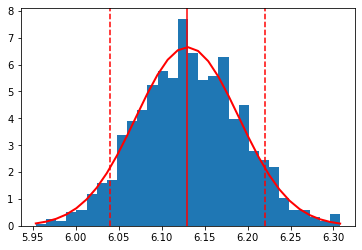

In [101]:
count, bins, ignored = plt.hist(s, 30, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2)),
        linewidth=2, color='r')
plt.axvline(x=mu, color='r')
plt.axvline(x=x_low, linestyle='--', color='r')
plt.axvline(x=x_up, linestyle='--', color='r')
plt.show()

<b> Answer: </b> The two lengths are 6.04 cm and 6.22 cm

---
#### 6. 	An English professor assigns letter grades on a test according to the following scheme:

> A:  Top 13% of scores  
  B:  Scores below the top 13% and above the bottom 55%  
  C:  Scores below the top 45% and above the bottom 20%  
  D:  Scores below the top 80% and above the bottom 9%  
  F:  Bottom 9% of scores  
        
Scores on the test are normally distributed with a mean of 78.8 and a standard deviation of 9.8.  Find the numerical limits for a C grade.  Round your answers to the nearest whole number, if necessary. 

---

In [133]:
# store the mean: m
m = 78.8

# store the standard deviation: std
std = 9.8

# upper bound z: z_u
z_u = st.norm.ppf(.55)
# lower bound z: z_l
z_l = st.norm.ppf(.20)

# lower length: x_l
x_l = round((z_l * std) + m)
# upper length: x_u
x_u = round((z_u * std) + m)

print("Lower limit = {}".format(x_l))
print("Upper limit = {}".format(x_u))


Lower limit = 71
Upper limit = 80


<b> Answer: </b> C grades range from 71-80

---
#### 7. 	Suppose ACT Composite scores are normally distributed with a mean of 21.2 and a standard deviation of 5.4.  A university plans to admit students whose scores are in the top 45%.  What is the minimum score required for admission?  Round your answer to the nearest tenth, if necessary.
---

In [134]:
# store the mean: m
m = 21.2

# store the standard deviation: std
std = 5.4

# find the z-score for top 45%: z
z = st.norm.ppf(.55)

# find the minimum score: min_score
min_score = round((z * std) + m, 1)

print("The minimum score for admission is {}".format(min_score))

The minimum score for admission is 21.9


<b> Answer: </b> The minimum ACT score for admission is 21.9

---
#### 8. 	Consider the probability that less than 11 out of 151 students will not graduate on time.  Assume the probability that a given student will not graduate on time is 9%.  Approximate the probability using the normal distribution. (Round your answer to 4 decimal places.)
---

In [142]:
# number of students: n
n = 151

# probability that a given student will not graduate on time: p
p = 0.09

# number of success (failures): x
x = 10

# utilizing binomial cumulative density function
prob = round(st.binom.cdf(x, n, p, loc=0), 6) * 100

print("The probability that fewer than 11 students pass is {}%".format(prob))

The probability that fewer than 11 students pass is 19.1967%


<b> Answer: </b> The probability that fewer than 11 students pass is 19.1967%

---
#### 9. 	The mean lifetime of a tire is 48 months with a standard deviation of 7.  If 147 tires are sampled, what is the probability that the mean of the sample would be greater than 48.83 months? (Round your answer to 4 decimal places)
---

In [162]:
# store mean: m
m = 48

# store standard deviation: std
std = 7

# store number of trials: n
n = 147

# store sample mean: x
x = 48.83

# calculate standard error: sde
sde = std/np.sqrt(n)

# calculate p value
p = round(1 - st.norm.cdf(x, m, sde), 6) * 100
print("The probability the mean sample would be greater than 48.83 months is {}%".format(p))

The probability the mean sample would be greater than 48.83 months is 7.5273%


<b> Answer: </b> The probability the mean sample would be greater than 48.83 months is 7.5273%

---
#### 10. 	The quality control manager at a computer manufacturing company believes that the mean life of a computer is 91 months, with a standard deviation of 10.  If he is correct, what is the probability that the mean of a sample of 68 computers would be greater than 93.54 months? (Round your answer to 4 decimal places)
---

In [167]:
# store mean: m
m = 91

# store standard deviation: std
std = 10

# store sample: n
n = 68

# sample mean: x
x = 93.54

# store standard error: sde
sde = std/np.sqrt(n)

# calculate p value
p = round(1 - st.norm.cdf(x, m, sde), 6) * 100
print("The probability the mean sample of {} computers would be greater than {} is {}%".format(n, x, p))

The probability the mean sample of 68 computers would be greater than 93.54 is 1.8106%


<b> Answer: </b> The probability the mean sample of 68 computers would be greater than 93.54 is 1.8106%

---
#### 11. 	A director of reservations believes that 7% of the ticketed passengers are no-shows.  If the director is right, what is the probability that the proportion of no-shows in a sample of 540 ticketed passengers would differ from the population proportion by less than 3%? (Round your answer to 4 decimal places)
---

In [276]:
from scipy.stats import binom

# sample: n
n = 540

# prob of no-shows: p
p = 0.07

# define upper bound, 10%: upper
upper = 0.10

# define lower bound, 4%: lower
lower = 0.04

upper_prob = st.binom.cdf(upper*n, n, p)
lower_prob = st.binom.cdf(lower*n, n, p)

prob = round(upper_prob - lower_prob, 6) * 100

print("The probability the proportion of no shows would differ by less than 3 percent is {}%".format(prob))

The probability the proportion of no shows would differ by less than 3 percent is 99.469%


<b> Answer: </b> The probability the proportion of no shows would differ by less than 3 percent is 99.469%

---
#### 12. 	A bottle maker believes that 23% of his bottles are defective.  If the bottle maker is accurate, what is the probability that the proportion of defective bottles in a sample of 602 bottles would differ from the population proportion by greater than 4%? (Round your answer to 4 decimal places)
---

In [277]:
# sample: n
n = 602

# prob of defective bottles, 23%: p
p = 0.23

# define upper bound, 27%: upper
upper = 0.27

# define lower bound, 19%: lower
lower = 0.19

upper_prob = st.binom.cdf(upper*n, n, p)
lower_prob = st.binom.cdf(lower*n, n, p)

prob = round(1 - (upper_prob - lower_prob), 6) * 100

print("The probability the proportion of defective bottles would differ by greater than 4 percent is {}%".format(prob))

The probability the proportion of defective bottles would differ by greater than 4 percent is 1.9994%


<b> Answer: </b> The probability the proportion of defective bottles would differ by greater than 4 percent is 1.9994%




---
#### 13. 	A research company desires to know the mean consumption of beef per week among males over age 48.  Suppose a sample of size 208 is drawn with x ̅  = 3.9.  Assume ® = 0.8 .  Construct the 80% confidence interval for the mean number of lb. of beef per week among males over 48. (Round your answers to 1 decimal place) 
---







In [282]:
# sample: n
n = 208
# mean: m
m = 3.9
# standard deviation: std
std = 0.8
# standard error of the mean: ste
ste = std/np.sqrt(n)
# confidence interval, 80%: CI
CI = [.1,.9]

lower = round(norm.ppf(CI[0], m, ste), 1)
upper = round(norm.ppf(CI[1], m, ste), 1)

print("Lower Limit: {}\nUpper Limit: {}".format(lower, upper))

Lower Limit: 3.8
Upper Limit: 4.0


<b> Answer: </b> The lower limit is 3.8, the upper limit is 4.0

---
#### 14. 	An economist wants to estimate the mean per capita income (in thousands of dollars) in a major city in California.  Suppose a sample of size 7472 is drawn with x ̅  = 16.6.  Assume ® = 11 .  Construct the 98% confidence interval for the mean per capita income. (Round your answers to 1 decimal place) 
---


In [289]:
# sample: n
n = 7472
# mean: m
m = 16.6
# standard deviation: std
std = 11
# standard error of the mean: ste
ste = std/np.sqrt(n)
# confidence interval, 98%: CI
CI = [.01,.99]

lower = round(norm.ppf(CI[0], m, ste), 1)
upper = round(norm.ppf(CI[1], m, ste), 1)
result = [lower, upper]
print(result)

[16.3, 16.9]


<b> Answer: </b> The 98% confidence interval for the mean per capita income is [16.3, 16.9]

---
#### Find the value of t such that 0.05 of the area under the curve is to the left of t.  Assume the degrees of freedom equals 26.
---

This picture best describes the problem:

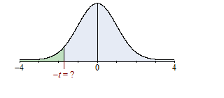

In [291]:
# find t-value: t
t = scipy.stats.t.ppf(q=.05,df=26)
print(t)

-1.7056179197592731


<b> Answer: </b> t = -1.7056179197592731

---
<b> Question 16 </b>

The following measurements (in picocuries per liter) were recorded by a set of helium gas detectors installed in a laboratory facility:  
	                     
    383.6, 347.1, 371.9, 347.6, 325.8, 337
	
Using these measurements, construct a 90% confidence interval for the mean level of helium gas present in the facility.  Assume the population is normally distributed.  

Step 1. Calculate the sample mean for the given sample data. (Round answer to 2 decimal places). 


Step 2. Calculate the sample standard deviation for the given sample data. (Round answer to 2 decimal places). 


Step 3. Find the critical value that should be used in constructing the confidence interval. (Round answer to 3 decimal places). 


Step 4. Construct the 90% confidence interval. (Round answer to 2 decimal places).

---

In [334]:
# measurements
measurements = [383.6, 347.1, 371.9, 347.6, 325.8, 337]
# mean of measurements: m
m = round(np.mean(measurements), 2)
# standard deviation of measurements: std
std = round(np.std(measurements, ddof=1), 2)
# sample size: n
n = len(measurements)
# degree of freedom: dof
dof = n - 1
# t-value: t
t = st.t.ppf(q=.95,df=dof)
# construct confidence interval
lower = round(m-t*std/np.sqrt(n), 2)
upper = round(m+t*std/np.sqrt(n), 2)
ci = [lower, upper]
print("Step 1: mean = {}\nStep 2: standard deviation = {}\nStep 3: t = {}\nStep 4: 90% Confidence Interval = {}".format(m, std, t, ci))

Step 1: mean = 352.17
Step 2: standard deviation = 21.68
Step 3: t = 2.015048372669157
Step 4: 90% Confidence Interval = [334.34, 370.0]


<b> Answer: </b>   
Step 1: mean = 352.17  
Step 2: standard deviation = 21.68  
Step 3: t = 2.015048372669157  
Step 4: 90% Confidence Interval = [334.34, 370.0]


---
#### 17. 	A random sample of 16 fields of spring wheat has a mean yield of 46.4 bushels per acre and standard deviation of 2.45 bushels per acre.  Determine the 80% confidence interval for the true mean yield.  Assume the population is normally distributed.  

Step 1. Find the critical value that should be used in constructing the confidence interval. (Round answer to 3 decimal places) 


Step 2. Construct the 80% confidence interval. (Round answer to 1 decimal place)

---





In [340]:
# sample: n
n = 16
# mean: m
m = 46.4
# standard deviation: std
std = 2.45
# degrees of freedom
dof = n - 1
# find t value
t = round(st.t.ppf(q=.90,df=dof), 3)
# construct confidence interval
lower = round(m-t*std/np.sqrt(n), 1)
upper = round(m+t*std/np.sqrt(n), 1)
ci = [lower, upper]
print("t value: {}\nConfidence Interval: {}".format(t, ci))

t value: 1.341
Confidence Interval: [45.6, 47.2]


<b> Answer: </b>   
t value: 1.341  
Confidence Interval: [45.6, 47.2]

---
#### 18. 	A toy manufacturer wants to know how many new toys children buy each year.  She thinks the mean is 8 toys per year.  Assume a previous study found the standard deviation to be 1.9.  How large of a sample would be required in order to estimate the mean number of toys bought per child at the 99% confidence level with an error of at most 0.13 toys? (Round your answer up to the next integer)
---

In [363]:
# mean: m
m = 8
# standard deviation: std
std = 1.9
# mean error: me
me = 0.13
# z score: z
z = st.norm.ppf(.99)
# solve for n sample: n = z^2 * std^2 / me^2
n = round(z**2*std**2/me**2)
print(n)

1156


<b> Answer: </b> The sample would need to be 1156 children.

---
#### 19. 	A research scientist wants to know how many times per hour a certain strand of bacteria reproduces.  He believes that the mean is 12.6.  Assume the variance is known to be 3.61.  How large of a sample would be required in order to estimate the mean number of reproductions per hour at the 95% confidence level with an error of at most 0.19 reproductions? (Round your answer up to the next integer)
---

In [364]:
# variance: v
v = 3.61
# standard deviation: std
std = np.sqrt(v)
# mean error: me
me = 0.19
# z score: z
z = st.norm.ppf(.95)
# solve for n sample: n = z^2 * std^2 / me^2
n = round(z**2*std**2/me**2)
print(n)

271


<b> Answer: </b> The required sample size is 271.

---
#### 20. 	The state education commission wants to estimate the fraction of tenth grade students that have reading skills at or below the eighth grade level.

Step 1. Suppose a sample of 2089 tenth graders is drawn. Of the students sampled, 1734 read above the eighth grade level.  Using the data, estimate the proportion of tenth graders reading at or below the eighth grade level. (Write your answer as a fraction or a decimal number rounded to 3 decimal places) 


Step 2. Suppose a sample of 2089 tenth graders is drawn.  Of the students sampled, 1734 read above the eighth grade level.  Using the data, construct the 98% confidence interval for the population proportion of tenth graders reading at or below the eighth grade level. (Round your answers to 3 decimal places)

---

In [385]:
# total students: n
n = 2089
# students reading above 8th grade level: x1
x1 = 1734
# students reading below 8th grade level: x2
x2 = n - x1
# proportion of students reading below 8th grade level: x3
p = round(x2/n, 3)
print("Proportion of 10th graders reading below an 8th grade level: {}".format(x3))

Proportion of 10th graders reading below an 8th grade level: 0.17


In [386]:
# z-score: z 
z = st.norm.ppf(.98)

# lower bound: lower
lower = round((p-z*np.sqrt(p*(1-p)/n)), 3)

# upper bound: upper
upper = round((p+z*np.sqrt(p*(1-p)/n)), 3)

ci = [lower, upper]
print("The 98% confidence interval is: {}".format(ci))

The 98% confidence interval is: [0.153, 0.187]


<b> Answer: </b> 17% of 10th graders read below an 8th grade level. The 98% confidence interval is 15.3% - 18.7%

---
#### 21.  An environmentalist wants to find out the fraction of oil tankers that have spills each month.

Step 1. Suppose a sample of 474 tankers is drawn.  Of these ships, 156 had spills.  Using the data, estimate the proportion of oil tankers that had spills. (Write your answer as a fraction or a decimal number rounded to 3 decimal places) 

Step 2. Suppose a sample of 474 tankers is drawn.  Of these ships, 156 had spills.  Using the data, construct the 95% confidence interval for the population proportion of oil tankers that have spills each month. (Round your answers to 3 decimal places)

---

In [387]:
# sample of tankers: n
n = 474
# tankers with spills: x1
x = 156
# proportion of tankers with spills: p
p = round(x/n, 3)
print("Proportion of tankers with spills: {}".format(p))

Proportion of tankers with spills: 0.329


In [388]:
# z-score: z 
z = st.norm.ppf(.95)

# lower bound: lower
lower = round((p-z*np.sqrt(p*(1-p)/n)), 3)

# upper bound: upper
upper = round((p+z*np.sqrt(p*(1-p)/n)), 3)

ci = [lower, upper]
print("The 95% confidence interval is: {}".format(ci))

The 95% confidence interval is: [0.294, 0.364]


<b> Answer: </b> 32.9% of tankers have spills each month. The 95% confidence interval is 29.4% - 36.4%